# *Загрузка данных и первичный осмотр*

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [244]:
url='https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/refs/heads/main/seminars/S02/S02-hw-dataset.csv'
data = pd.read_csv(url, sep=',')

In [245]:
data.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [247]:
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


# *Пропуски, дубликаты и базовый контроль качества*

In [248]:
data.isna().mean()

,0
user_id,0.00000
age,0.04878
country,0.00000
purchases,0.00000
revenue,0.00000


In [249]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [250]:
age = data[(data['age'] < 0) | (data['age'] > 100)]  # Проверка возраста
if not age.empty:
  print(age)

   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


In [251]:
purchases = data[data['purchases'] < 0]  # Проверка покупок
if not purchases.empty:
  print(purchases)

   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


In [252]:
revenue = data[data['revenue'] < 0]  # Проверка дохода
if not revenue.empty:
  print(revenue)

In [253]:
conflict = data[(data['purchases'] == 0) & (data['revenue'] > 0)]  # Нулевые покупки с ненулевым доходом
if not conflict.empty:
    print(conflict)

In [254]:
conflict = data[(data['revenue'] == 0) & (data['purchases'] > 0)]  # Нулевой доход с ненулевыми покупками
if not conflict.empty:
    print(conflict)

    user_id   age country  purchases  revenue
10       11  24.0      US          4        0


В ходе анализа выявлены аномалии в данных пользователя с ID 6: возраст 120 лет является нереалистичным, отрицательное количество покупок (-1) - логическое противоречие. Также обнаружен пользователь с ID 11, у которого зафиксированы 4 покупки, но нулевой доход.

# *Базовый EDA: группировки, агрегаты и частоты*

In [255]:
data['country'].value_counts()

,count
country,
RU,13
FR,12
US,8
DE,6
CN,2


In [256]:
stats = data.groupby('country').agg({  # Группировка по странам
    'age': 'mean',  # Средний возраст
    'purchases': 'sum',  # Всего покупок
    'revenue': 'sum'  # Всего доход
})
print(stats)

               age  purchases  revenue
country                               
CN       24.000000          9     2108
DE       34.600000         39     8673
FR       46.250000         51     8111
RU       30.076923         62    10271
US       36.714286         37     4459


In [257]:
mean_age = data['age'].mean()

stats = data.groupby(data['age'] < mean_age).agg({  # Группировка поо среднему возрасту
    'user_id': 'count',
    'age': 'mean',
    'revenue': 'sum'
})
print(stats)

       user_id        age  revenue
age                               
False       17  52.600000    12441
True        24  26.458333    21181


По странам доминируют пользователи из России (13 чел.) и Франции (12 чел.), при этом российских пользователей наиболее высокий доход и покупок (62 покупки и 10271 доход), что значительно выше других стран. Французские пользователи являются самыми возрастными (46,25 лет).


---


Пользователи младше среднего возраста (26,46 лет) составляют большинство и генерируют больший совокупный доход, хотя их средний возраст почти в два раза ниже.

# *Визуализация данных в Matplotlib*

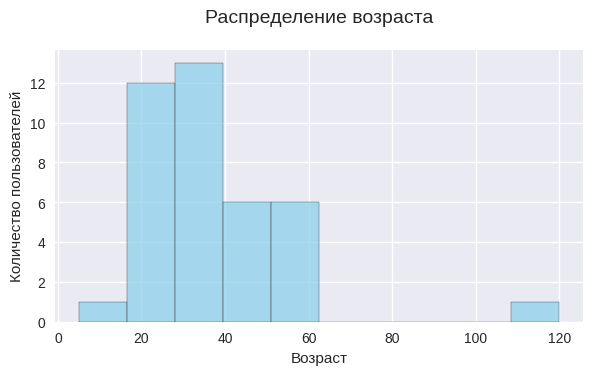

In [258]:
age = data['age'].dropna()

# Создание графиков
gridsize = (3, 2)
plt.figure(figsize=(15, 12))

# Сетка
ax = plt.subplot2grid(gridsize, (0, 0))
ax.hist(age, bins=10, color='skyblue', edgecolor='black', alpha=0.7)

# Подписи осей и заголовок
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество пользователей')
ax.set_title('Распределение возраста', fontsize=14, pad=20)

plt.savefig('hist.png', dpi=300, bbox_inches='tight')
plt.show()

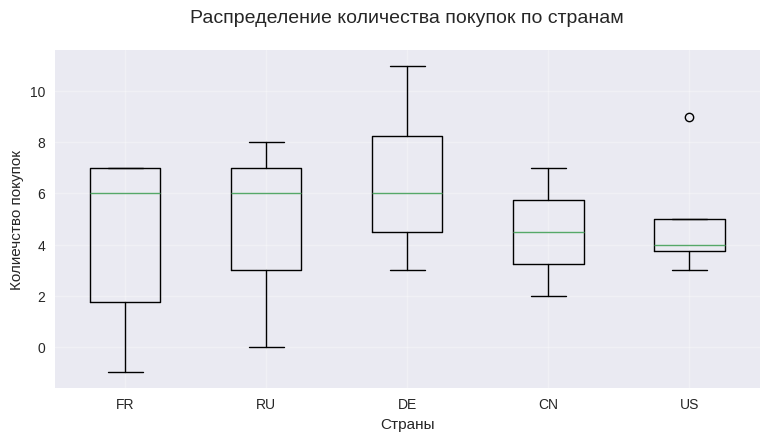

In [259]:
# Группируем данные по странам
countries = data['country'].unique()
purchases_by_country = [data[data['country'] == country]['purchases'] for country in countries]

# Создание графиков
gridsize = (3, 2)
plt.figure(figsize=(15, 12))

# Сетка
ax = plt.subplot2grid(gridsize, (0, 0))
ax.boxplot(purchases_by_country, tick_labels=countries)

# Подписи
ax.set_xlabel('Страны')
ax.set_ylabel('Колиечство покупок')
ax.set_title('Распределение количества покупок по странам', fontsize=14, pad=20)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

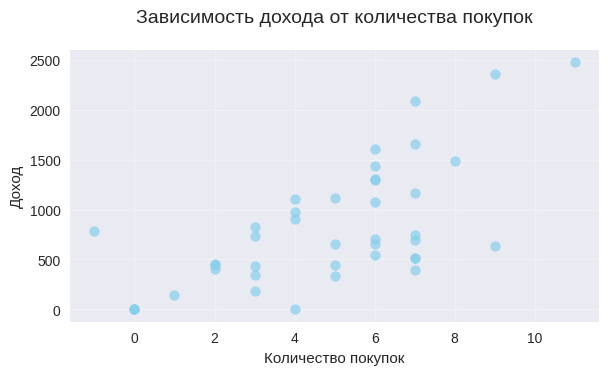

In [260]:
# Создание графиков
gridsize = (3, 2)
plt.figure(figsize=(15, 12))

# Сетка
ax = plt.subplot2grid(gridsize, (0, 0))
ax.scatter(data['purchases'], data['revenue'], alpha=0.7, color='skyblue')

# Подписи
ax.set_xlabel('Количество покупок')
ax.set_ylabel('Доход')
ax.set_title('Зависимость дохода от количества покупок', fontsize=14, pad=20)

ax.grid(True, alpha=0.3)

plt.savefig('scatter.png', dpi=300, bbox_inches='tight')
plt.show()